# **Redes Neurais Convolucionais e suas aplicações na Física**

Aluno: Humberto Sousa Martins

Matrícula: 93724

## **Código fonte**
**Importante**: antes de executar o código, é sugerido alterar o ambiente de execução para GPU, para maior rapidez no treinamento. Para isso acesse na barra superior Ambiente de Execução > Alterar tipo do ambiente de execução > Selecionar GPU > Salvar . Mudar o ambiente de execução apaga todas as variáveis carregadas e arquivos subidos no ambiente.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.models import Model , Sequential
from sklearn.model_selection import train_test_split
from scipy import ndimage

#Importamos os dados do MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Abrir os dados customizados
# Inputs
x_customdata=np.loadtxt(open('new_x_customdata.txt', 'r')).reshape(80,28,28)
#x_ajuste =np.loadtxt(open('ajuste.txt', 'r')).reshape(80,28,28) 
# Labels
y_customdata=np.loadtxt(open('new_y_customdata.txt','r')).reshape(80)

In [ ]:
x_customdata

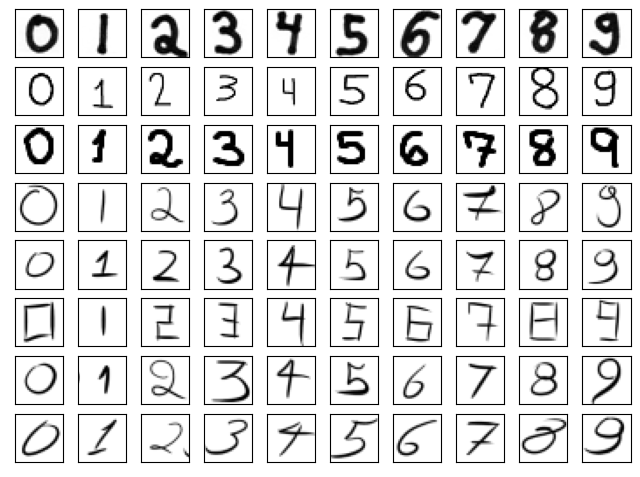

In [ ]:
# Plotamos os inputs customizados
fig,ax = plt.subplots(8,10,True,True,figsize=(8,6),dpi=100)
k=0
for i in range(8):
  for j in range(10):
    ax[i][j].set_xticks([])
    ax[i][j].set_yticks([])
    ax[i][j].imshow(np.squeeze(x_customdata[k]),cmap=plt.cm.binary)
    k+=1
#plt.savefig('fig1 - customdata',dpi = 100)

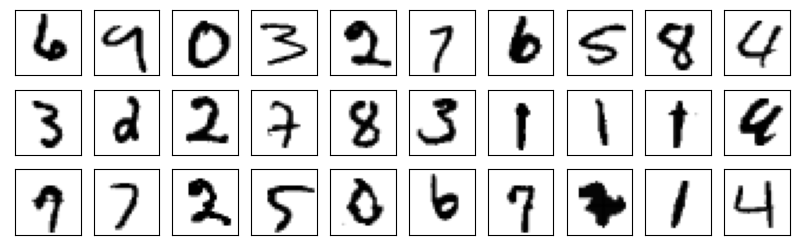

In [ ]:
# Comparamos com alguns dígitos sorteados do MNIST
rng = np.random.default_rng()
idx = rng.integers(0,x_train.shape[0]-30)

fig,ax = plt.subplots(3,10,True,True,figsize=(10,3),dpi=100)
k=0
for i in range(3):
  for j in range(10):
    ax[i][j].set_xticks([])
    ax[i][j].set_yticks([])
    ax[i][j].imshow(np.squeeze(x_train[idx+k]),cmap=plt.cm.binary)
    k+=1

#plt.savefig('fig2 - mnist',dpi=100)

# Rodar apenas uma vez

In [ ]:
# Ajustamos os inputs para estarem no formato esperado pela rede
# o formato de entrada tem como ultimo valor da tupla o canal de cor, lidando com imagens monocromáticas
# temos só uma cor, mas ainda precisamos especificar a tupla nesse formato para a rede.

x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)
x_customdata=x_customdata.reshape(x_customdata.shape[0], 28, 28,1)
x_ajuste=x_ajuste.reshape(x_ajuste.shape[0], 28, 28,1)
input_shape = (28, 28, 1)


# Os dados do MNIST vem com valores de 0 a 255, precisamos normalizá-los
# Converter os valores para float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizamos
x_train /= 255
x_test /= 255


In [ ]:
historia = model.fit

# Define o modelo simples

In [ ]:
# Criamos o modelo da rede densamente conectada SIMPLES
def modelsimple(neurons, camadas):
  model = Sequential()
  model.add(Flatten())
  for i in range(camadas):
    model.add(Dense(neurons, activation='relu'))

  model.add(Dense(10,'softmax'))
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
# Apaga versões antigas e redefine o modelo, e retorna o summário
try:
  del modelsimple_1
  print("Modelo anterior apagado")
except:
  print("Modelo não definido")
modelsimple_1 = modelsimple(30,1)
modelsimple_1.fit(x_customdata,y_customdata,epochs=1)
modelsimple_1.summary()

Modelo não definido
3/3 [==============================] - 3s 8ms/step - loss: 2.3707 - accuracy: 0.1500
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


# Testa repetidamente o modelo

In [ ]:
# Definimos dois datasets de validação,o de dígitos customizado e um de 10000 dígitos do mnist não vistos no treinamneto
custom = (x_customdata,y_customdata)
ajuste = (x_ajuste,y_customdata)
mnist = (x_test,y_test)
epochs = 10
testes = 10
histsimp=[]

# Faz o fit , redefinindo o modelo a cada iteração de testes
for i in range(testes):
  try:
    del modelsimple_1
    print("Modelo anterior apagado")
  except:
    print("Modelo não definido")
  modelsimple_1 = modelsimple(30,1)
  print("Modelo definido")

  print(f"Teste número {i}")
  histsimp.append(modelsimple_1.fit(x_train,y_train,epochs=epochs,validation_data=ajuste,verbose=0))

Modelo não definido
Modelo definido
Teste número 0
Modelo anterior apagado
Modelo definido
Teste número 1
Modelo anterior apagado
Modelo definido
Teste número 2
Modelo anterior apagado
Modelo definido
Teste número 3
Modelo anterior apagado
Modelo definido
Teste número 4
Modelo anterior apagado
Modelo definido
Teste número 5
Modelo anterior apagado
Modelo definido
Teste número 6
Modelo anterior apagado
Modelo definido
Teste número 7
Modelo anterior apagado
Modelo definido
Teste número 8
Modelo anterior apagado
Modelo definido
Teste número 9


In [ ]:
# compila os resultados em um array do numpy
acc=[],[]
for i in range(testes):
  acc[0].append(histsimp[i].history["accuracy"])
  acc[1].append(histsimp[i].history["val_accuracy"])
acc_arr = np.array(acc)
acc_arr = acc_arr.mean(axis=1)


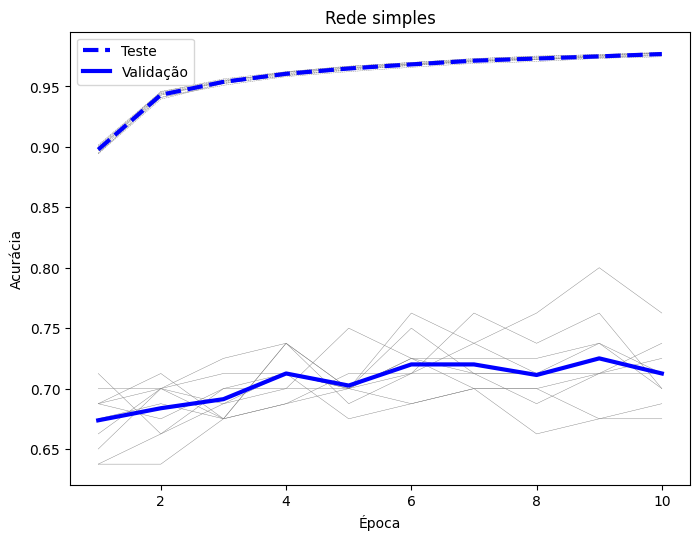

In [ ]:
# Plota os resultados
fig,ax = plt.subplots(1,1,figsize=(8,6),dpi=100)
for i in range(testes):
  ax.plot(range(1,epochs+1),histsimp[i].history['accuracy'],'--',c='gray',lw=0.3)
  ax.plot(range(1,epochs+1),histsimp[i].history['val_accuracy'],c='gray',lw=0.3)

ax.plot(range(1,epochs+1),acc_arr[0],'--',c='b',label="Teste",lw=3)
ax.plot(range(1,epochs+1),acc_arr[1],c='b',label="Validação",lw=3)
ax.set(title='Rede simples',xlabel='Época',ylabel='Acurácia')
ax.legend()

plt.savefig(f'fig 1 - rede simples - 30neurons_1camada_10epocas.png',dpi=100)

# Testa com diferentes neurons

In [ ]:
# Testa a rede ao aumentar os neurons
# Definimos dois datasets de validação,o de dígitos customizado e um de 10000 dígitos do mnist não vistos no treinamneto
custom = (x_customdata,y_customdata)
mnist = (x_test,y_test)
epochs = 10
neurons = range(10,210,10)
histsimp=[]

# Faz o fit , redefinindo o modelo a cada iteração de testes
for i in range(10,210,10):
  try:
    del modelsimple_2
    print("Modelo anterior apagado")
  except:
    print("Modelo não definido")
  modelsimple_2 = modelsimple(i,1)
  print("Modelo definido")

  print(f"Teste número {i}")
  histsimp.append(modelsimple_2.fit(x_train,y_train,epochs=epochs,validation_data=custom,verbose=0))

Modelo anterior apagado
Modelo definido
Teste número 10
Modelo anterior apagado
Modelo definido
Teste número 20
Modelo anterior apagado
Modelo definido
Teste número 30
Modelo anterior apagado
Modelo definido
Teste número 40
Modelo anterior apagado
Modelo definido
Teste número 50
Modelo anterior apagado
Modelo definido
Teste número 60
Modelo anterior apagado
Modelo definido
Teste número 70
Modelo anterior apagado
Modelo definido
Teste número 80
Modelo anterior apagado
Modelo definido
Teste número 90
Modelo anterior apagado
Modelo definido
Teste número 100
Modelo anterior apagado
Modelo definido
Teste número 110
Modelo anterior apagado
Modelo definido
Teste número 120
Modelo anterior apagado
Modelo definido
Teste número 130
Modelo anterior apagado
Modelo definido
Teste número 140
Modelo anterior apagado
Modelo definido
Teste número 150
Modelo anterior apagado
Modelo definido
Teste número 160
Modelo anterior apagado
Modelo definido
Teste número 170
Modelo anterior apagado
Modelo definido


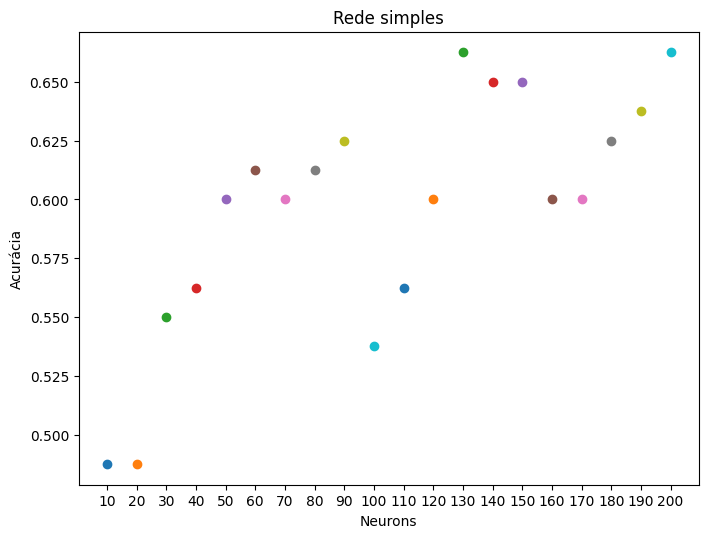

In [ ]:
# Plota os resultados
fig,ax = plt.subplots(1,1,figsize=(8,6),dpi=100)
for i in range(len(histsimp)):
    ax.scatter((i+1)*10,histsimp[i].history['val_accuracy'][-1],label=f"{(i+1)*10} neurons")

ax.set(title='Rede simples',xlabel='Neurons',ylabel='Acurácia')
ax.set_xticks(range(10,210,10))


plt.savefig(f'fig 2 - rede simples neurons - 10a100_1camada_1teste.png',dpi=100)

# Testa com diferentes camadas

In [ ]:
# Testa a rede ao aumentar as camadas
# Definimos dois datasets de validação,o de dígitos customizado e um de 10000 dígitos do mnist não vistos no treinamneto
custom = (x_customdata,y_customdata)
mnist = (x_test,y_test)
epochs = 10
camadas = range(1,11)
histsimp=[]

# Faz o fit , redefinindo o modelo a cada iteração de testes
for i in camadas:
  try:
    del modelsimple_3
    print("Modelo anterior apagado")
  except:
    print("Modelo não definido")
  modelsimple_3 = modelsimple(30,i)
  print("Modelo definido")

  print(f"Teste número {i}")
  histsimp.append(modelsimple_3.fit(x_train,y_train,epochs=epochs,validation_data=custom,verbose=0))

Modelo anterior apagado
Modelo definido
Teste número 1
Modelo anterior apagado
Modelo definido
Teste número 2
Modelo anterior apagado
Modelo definido
Teste número 3
Modelo anterior apagado
Modelo definido
Teste número 4
Modelo anterior apagado
Modelo definido
Teste número 5
Modelo anterior apagado
Modelo definido
Teste número 6
Modelo anterior apagado
Modelo definido
Teste número 7
Modelo anterior apagado
Modelo definido
Teste número 8
Modelo anterior apagado
Modelo definido
Teste número 9
Modelo anterior apagado
Modelo definido
Teste número 10


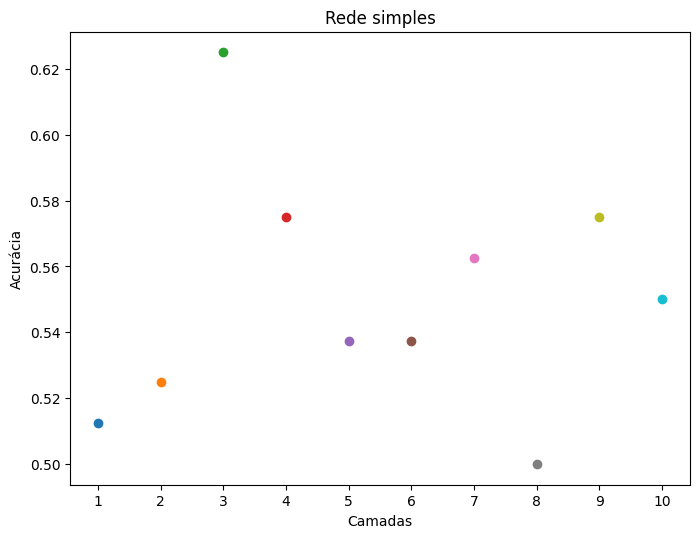

In [ ]:
# Plota os resultados
fig,ax = plt.subplots(1,1,figsize=(8,6),dpi=100)
for i in range(len(histsimp)):
    ax.scatter(i+1,histsimp[i].history['val_accuracy'][-1],label=f"{i} camadas")

ax.set(title='Rede simples',xlabel='Camadas',ylabel='Acurácia')
ax.set_xticks(camadas)


plt.savefig(f'fig 3 - rede simples camadas - 30neuron_1a10camada_1teste.png',dpi=100)

# Testa o centro de massa

x= 0.3210882746672965 y= -0.029214898810929313


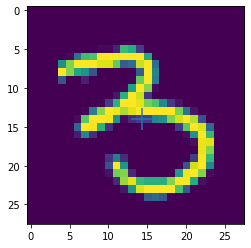

In [ ]:
a = x_train[5642]
cm = ndimage.measurements.center_of_mass(a)
print("x=",cm[1]-14,"y=",cm[0]-14)
plt.imshow(a.squeeze())
plt.scatter(cm[1], cm[0], s=500, c='C0', marker='+')

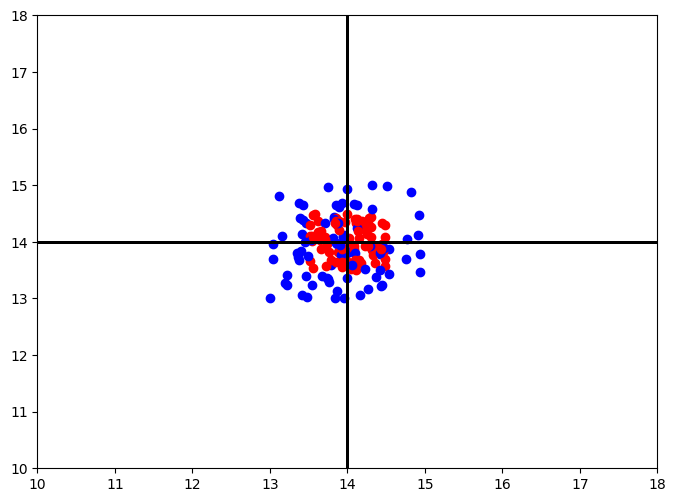

In [ ]:
cm_custom=[]
cm_mnist=[]
fig,ax = plt.subplots(1,1,figsize=(8,6),dpi=100)

for i in range(80):
  cm_custom.append(ndimage.measurements.center_of_mass(x_ajuste[i]))
  cm_mnist.append(ndimage.measurements.center_of_mass(x_train[i]))
  ax.scatter(cm_custom[i][1],cm_custom[i][0],c="b")
  ax.scatter(cm_mnist[i][1],cm_mnist[i][0],c="r")
  ax.axhline(14,c="k",lw=0.8)
  ax.axvline(14,c="k",lw=0.8)
  ax.set(xlim=(10,18),ylim=(10,18))

plt.savefig(f'fig 4 - cm 80.png',dpi=100)

# Define os modelos CNN e Dense

In [ ]:
# Criamos o modelo da rede para a rede convolucional
def modelCNN():
  model = Sequential()
  model.add(Conv2D(24, kernel_size=(3,3),padding='same',activation="relu", input_shape=input_shape, name="Conv_1"))
  model.add(MaxPooling2D(pool_size=(2, 2), name="Maxpool_1"))
  #model.add(Dropout(0.2))
  model.add(Conv2D(32, kernel_size=(3,3),padding='same',activation="relu", input_shape=input_shape, name="Conv_2"))
  model.add(MaxPooling2D(pool_size=(2, 2), name="Maxpool_2"))
  #model.add(Dropout(0.2))
  model.add(Conv2D(48, kernel_size=(3,3),padding='same',activation="relu", input_shape=input_shape, name="Conv_3"))
  model.add(MaxPooling2D(pool_size=(2, 2), name="Maxpool_3"))
  model.add(Flatten())
  model.add(Dense(72, activation='relu'))
  #model.add(Dropout(0.3))
  model.add(Dense(10,activation=tf.nn.softmax, name="final"))
  inputs = Input(shape=(28,28,1))
  outputs = model.get_layer(name="final").output
  model.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])
  return model

# Criamos o modelo da rede densamente conectada
def modeldense():
  model = Sequential()
  model.add(Flatten())
  #model.add(Dropout(0.2))
  model.add(Dense(64, activation='relu',input_shape=(28,28,1)))
  #model.add(Dropout(0.2))
  model.add(Dense(48, activation='relu'))
  #model.add(Dropout(0.2))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(10,'softmax'))
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
# Compilamos os modelos
modelCNN_teste = modelCNN()
modeldense_teste = modeldense()


In [ ]:
modelCNN_teste.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 24)        240       
_________________________________________________________________
Maxpool_1 (MaxPooling2D)     (None, 14, 14, 24)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 32)        6944      
_________________________________________________________________
Maxpool_2 (MaxPooling2D)     (None, 7, 7, 32)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 48)          13872     
_________________________________________________________________
Maxpool_3 (MaxPooling2D)     (None, 3, 3, 48)          0         
_________________________________________________________________
flatten_42 (Flatten)         (None, 432)             

In [ ]:
modeldense_teste.fit(x_customdata,y_customdata,epochs=1)
modeldense_teste.summary()

3/3 [==============================] - 0s 8ms/step - loss: 2.3317 - accuracy: 0.1125
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_43 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_130 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_131 (Dense)            (None, 48)                3120      
_________________________________________________________________
dense_132 (Dense)            (None, 32)                1568      
_________________________________________________________________
dense_133 (Dense)            (None, 10)                330       
Total params: 55,258
Trainable params: 55,258
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Treinamento
epochs = 10
batch_size = 32
# Na variável train_data_split podemos definir um valor real de 0 a 1 para ser a fração do dataset disponível para o treinamneto
train_data_split = 1
idx_split = int(x_train.shape[0]*train_data_split)
# Definimos dois datasets de teste,o de dígitos customizado e um de 10000 dígitos do mnist não vistos no treinamneto
custom = (x_customdata,y_customdata)
mnist = (x_test,y_test)
print(train_data_split,idx_split,x_train[:idx_split].shape)

#apaga os modelos anteriores para assegurar que o treinamento será inicializado randomicamente
try:
  del modelCNN1
  print("Modelo anterior apagado")
except:
  print("Modelo não definido")
try:
  del modeldense1
  print("Modelo anterior apagado")
except:
  print("Modelo não definido")
# Define os novos modelos
modelCNN1 = modelCNN()
modeldense1 = modeldense()
#Treina as redes
print("Treinando rede CNN")
tf.keras.backend.clear_session()
histCNN = modelCNN1.fit(x=x_train[:idx_split],y=y_train[:idx_split], epochs=epochs,validation_data=custom)
print("Treinando rede Densa")
tf.keras.backend.clear_session()
histdense = modeldense1.fit(x=x_train[:idx_split],y=y_train[:idx_split], epochs=epochs,validation_data=custom)




1 60000 (60000, 28, 28, 1)
Modelo anterior apagado
Modelo anterior apagado
Treinando rede CNN
Epoch 1/10
1875/1875 [==============================] - 35s 5ms/step - loss: 0.1699 - accuracy: 0.9472 - val_loss: 1.0095 - val_accuracy: 0.7625
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0521 - accuracy: 0.9840 - val_loss: 0.4527 - val_accuracy: 0.8625
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0378 - accuracy: 0.9882 - val_loss: 0.8266 - val_accuracy: 0.7750
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.9519 - val_accuracy: 0.8125
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0238 - accuracy: 0.9928 - val_loss: 0.8019 - val_accuracy: 0.8000
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0182 - accuracy: 0.9941 - val_loss: 0.8476 - val_accuracy: 0.7875
Epoch 7/10
1875/1875 [==============

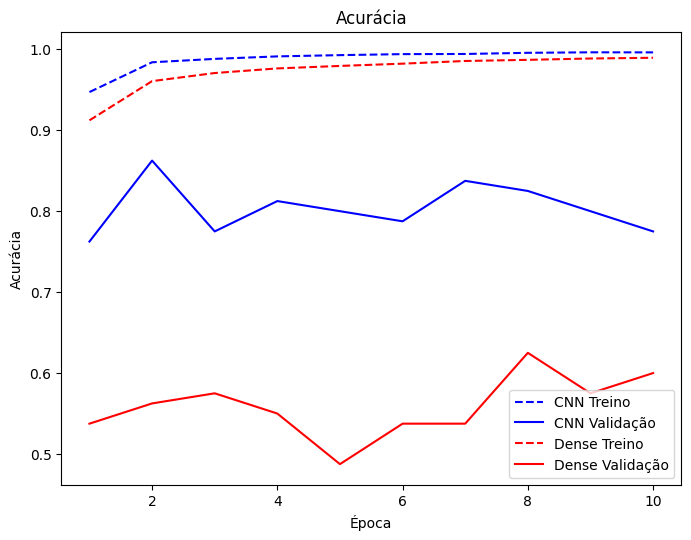

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(8,6),dpi=100)
ax.plot(range(1,epochs+1),histCNN.history['accuracy'],'--',c='b',label="CNN Treino")
ax.plot(range(1,epochs+1),histCNN.history['val_accuracy'],c='b',label='CNN Validação')
ax.plot(range(1,epochs+1),histdense.history['accuracy'],'--',c='r',label="Dense Treino")
ax.plot(range(1,epochs+1),histdense.history['val_accuracy'],c='r',label='Dense Validação')
ax.set(title='Acurácia',xlabel='Época',ylabel='Acurácia')
ax.legend()


plt.savefig(f'fig 3 - treinamento epocas:{epochs}_fracao_dataset:{int(train_data_split*100)}_batch:{batch_size}_custom.png',dpi=100)


3/3 [==============================] - 0s 5ms/step - loss: 2.2434 - accuracy: 0.5750


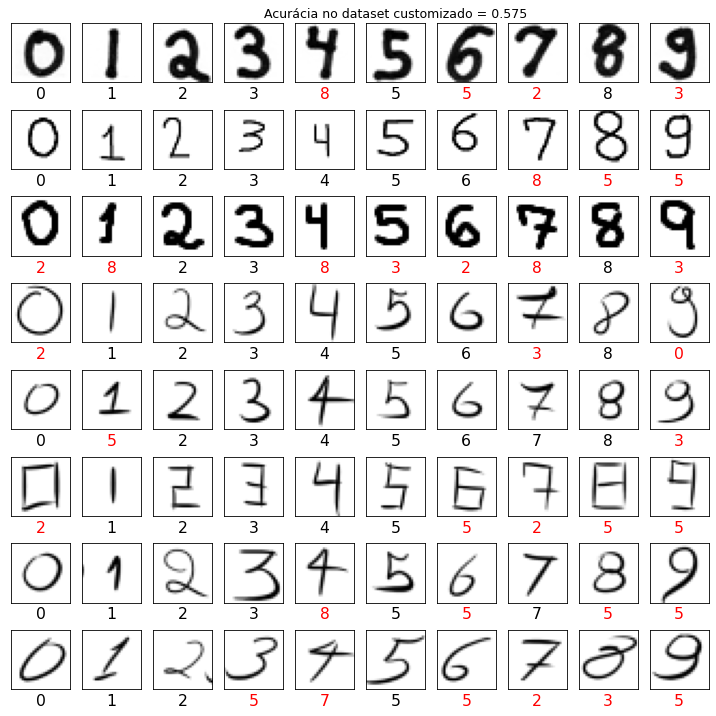

In [ ]:
# Visualisamos novamente nossos dados, agora com as previsões do modelo CNN

acc = modelCNN1.evaluate(x_customdata,y_customdata)
fig,ax = plt.subplots(8,10,True,True,figsize=(12,12),dpi=75)

k=0
for i in range(8):
  for j in range(10):
    if i==0 and j==5:
      ax[i][j].set_title(f'Acurácia no dataset customizado = {acc[1]:.3f}')
    ax[i][j].set_xticks([])
    ax[i][j].set_yticks([])

    pred = modelCNN1.predict(x_customdata[k].reshape(1, 28, 28, 1)).argmax()
    if pred != k%10 :
      ax[i][j].xaxis.label.set_color("r")

    ax[i][j].set_xlabel(pred,size=15)
    ax[i][j].imshow(np.squeeze(x_customdata[k]),cmap=plt.cm.binary)
    k+=1

#plt.savefig(f'fig6 - customdata pred{epochs}_{int(val_split*100)}',dpi = 100)

In [ ]:
# Testaremos como as redes performam com dados reduzidos

#Treinamento
epochs = 10
train_data_split = np.logspace(-4,0,9,endpoint=True)
accCNN=[]
accdense=[]
for i in train_data_split:
  print(f'Razão do dataset usada: {i:.4f}')
  idx_split = int(x_train.shape[0]*i)
  print(idx_split,x_train[:idx_split].shape)

  #apaga os modelos anteriores para assegurar que o treinamento será inicializado randomicamente
  try:
    del modelCNN2
    print("Modelo anterior apagado")
  except:
    print("Modelo não definido")
  try:
    del modeldense2
    print("Modelo anterior apagado")
  except:
    print("Modelo não definido")
  # Define os novos modelos
  modelCNN2 = modelCNN()
  modeldense2 = modeldense()
  # Treina as Redes
  print("Treinando rede CNN")
  tf.keras.backend.clear_session()
  modelCNN2.fit(x=x_train[:idx_split],y=y_train[:idx_split], epochs=epochs)
  tf.keras.backend.clear_session()
  modeldense2.fit(x=x_train[:idx_split],y=y_train[:idx_split], epochs=epochs)
  print("Treinando rede densa")
  accCNN.append(modelCNN2.evaluate(x_customdata,y_customdata)[1])
  accdense.append(modeldense2.evaluate(x_customdata,y_customdata)[1])

Razão do dataset usada: 0.0001
6 (6, 28, 28)
Modelo não definido
Modelo não definido
Treinando rede CNN
Epoch 1/10


ValueError: ignored

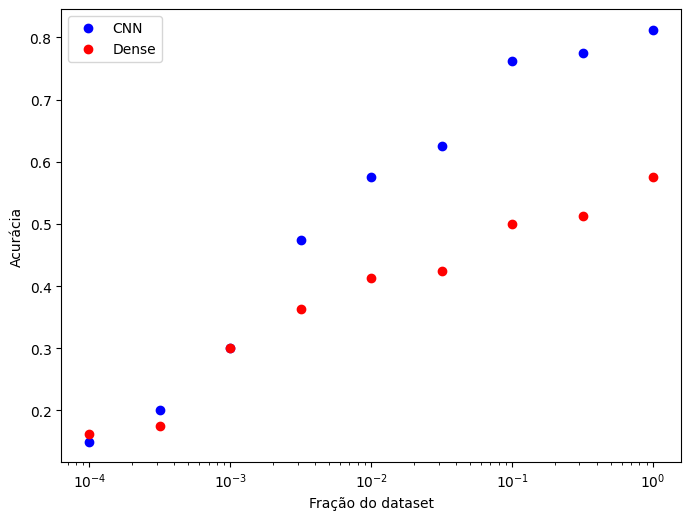

In [ ]:
fig,ax = plt.subplots(figsize=(8,6),dpi=100)
ax.plot(train_data_split,accCNN,'ob',label='CNN')
ax.plot(train_data_split,accdense,'or',label='Dense')
ax.set(ylabel='Acurácia',xlabel='Fração do dataset',xscale='log')
ax.legend()
plt.savefig('fig7 - res_fracoes_10_mnist',dpi=100)

A parte final do trabalho foi adaptada de: https://towardsdatascience.com/visualizing-intermediate-activations-of-a-cnn-trained-on-the-mnist-dataset-2c34426416c8

In [ ]:
layer_outputs = [layer.output for layer in modelCNN.layers[0:6]]
print(layer_outputs)
activation_model = Model(inputs=modelCNN.input,outputs=layer_outputs)

[<KerasTensor: shape=(None, 28, 28, 24) dtype=float32 (created by layer 'Conv_1')>, <KerasTensor: shape=(None, 14, 14, 24) dtype=float32 (created by layer 'Maxpool_1')>, <KerasTensor: shape=(None, 14, 14, 24) dtype=float32 (created by layer 'dropout')>, <KerasTensor: shape=(None, 14, 14, 48) dtype=float32 (created by layer 'Conv_2')>, <KerasTensor: shape=(None, 7, 7, 48) dtype=float32 (created by layer 'Maxpool_2')>, <KerasTensor: shape=(None, 7, 7, 48) dtype=float32 (created by layer 'dropout_1')>]


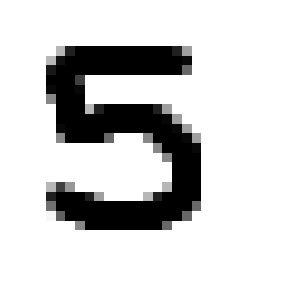

In [ ]:
index = 25
img = x_customdata[index].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap=plt.cm.binary)
plt.axis('off')
plt.savefig(f'fig7 - img {index}',dpi=100)

In [ ]:
activations = activation_model.predict(img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


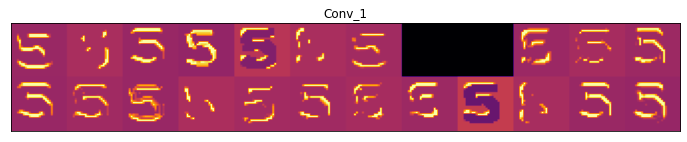

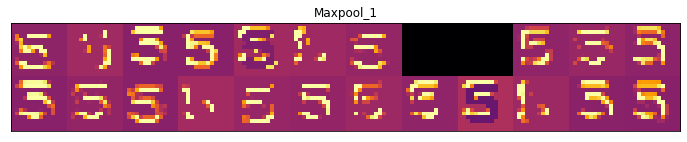

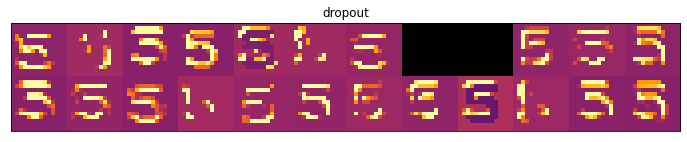

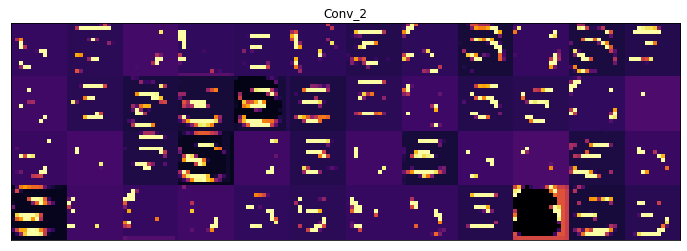

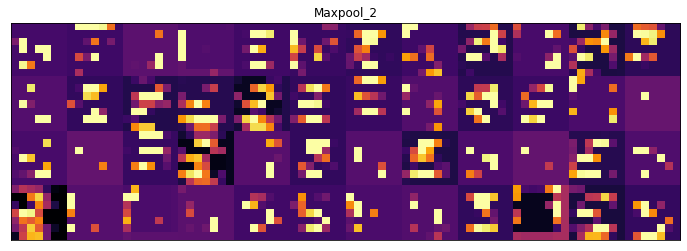

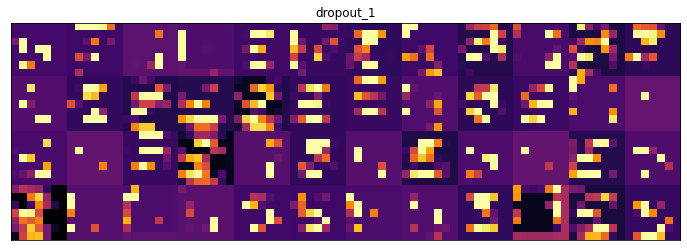

In [ ]:
layer_names = []
for layer in modelCNN.layers[0:6]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 12
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(display_grid, aspect='auto', cmap='inferno')
    plt.savefig(f'fig4 - int{index} {layer_name}',dpi=100)

In [ ]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'Conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)
 
 # retrieve weights from the second hidden layer
filters, biases = model.layers[0].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# plot first few filters
n_filters, ix = 24, 1
plt.figure(figsize=(20,20))
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	# specify subplot and turn of axis
	ax = plt.subplot(n_filters, 3, ix)
	ax.set_xticks([])
	ax.set_yticks([])
	# plot filter channel in grayscale
	plt.imshow(f[:, :, 0], cmap='inferno')
	ix += 1
	#plt.savefig(f'fig5 - kernels {index}_{i}',dpi=100)

# show the figure
plt.show()


NameError: ignored

In [ ]:
acc

[0.6173635125160217, 0.8666666746139526]

In [ ]:
print('Testando com dados customizados: ')


print('Previsão para dados customizados:')
for i in range(30):
    pred = model.predict(x_customdata[i].reshape(1, 28, 28, 1))
    if pred.argmax() != i%10 : p = 'Erro!'
    if pred.argmax() == i%10 : p = 'Correto'
    print(i%10 , end=" --> ")
    print(pred.argmax() ,'   ', p)
print(' ')

Testando com dados customizados: 
1/1 [==============================] - 0s 19ms/step - loss: 0.6174 - accuracy: 0.8667
Previsão para dados customizados:
0 --> 0     Correto
1 --> 1     Correto
2 --> 2     Correto
3 --> 3     Correto
4 --> 7     Erro!
5 --> 5     Correto
6 --> 6     Correto
7 --> 7     Correto
8 --> 8     Correto
9 --> 9     Correto
0 --> 0     Correto
1 --> 1     Correto
2 --> 2     Correto
3 --> 3     Correto
4 --> 4     Correto
5 --> 5     Correto
6 --> 9     Erro!
7 --> 7     Correto
8 --> 8     Correto
9 --> 9     Correto
0 --> 0     Correto
1 --> 1     Correto
2 --> 2     Correto
3 --> 3     Correto
4 --> 1     Erro!
5 --> 5     Correto
6 --> 8     Erro!
7 --> 7     Correto
8 --> 8     Correto
9 --> 9     Correto
 
